In [ ]:
#Temp

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregar os dados da planilha Excel
df = pd.read_excel("D:/Dados/Fintech/Modelo FinTech.xlsx")

# Separar os dados em features (X) e target (y)
X = df.drop('Valor', axis=1)
y = df['Categoria']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir a arquitetura da rede neural
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Avaliar o modelo
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Fazer previsões
predictions = model.predict(X_test_scaled)


In [ ]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Carregar dados do Excel
dados = pd.read_excel("D:/Dados/Fintech/Modelo FinTech.xlsx")

# Pré-processamento dos dados
# ... (limpar, normalizar, etc.)

# Dividir em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(dados_pre_processados, labels, test_size=0.2)

# Criar o modelo de rede neural
modelo = Sequential()
modelo.add(Dense(64, activation='relu', input_dim=X_treino.shape[1]))
modelo.add(Dense(32, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinar o modelo
modelo.fit(X_treino, y_treino, epochs=10, batch_size=32)

# Avaliar o modelo
resultado = modelo.evaluate(X_teste, y_teste)
print('Precisão:', resultado[1])

# Fazer previsões em novos dados
novo_cliente = # ... (dados do novo cliente)
previsao = modelo.predict(novo_cliente.reshape(1, -1))
if previsao > 0.5:
    print('Previsão: Compra provável')
else:
    print('Previsão: Compra improvável')


 
 Inicio 2024-05-03 09:42:35.322911
Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3137)           │    19,678,401 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3137)           │     9,843,906 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         6,276 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,538,727 (112.68 MB)

 Trainable params: 29,538,727 (112.68 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 64s 477ms/step - accuracy: 0.5255 - loss: 0.8141
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 287ms/step - accuracy: 0.6172 - loss: 0.6544
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 39s 305ms/step - accuracy: 0.6520 - loss: 0.6200
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 39s 302ms/step - accuracy: 0.6607 - loss: 0.6250
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 38s 300ms/step - accuracy: 0.6958 - loss: 0.5782
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 38s 296ms/step - accuracy: 0.6704 - loss: 0.6073
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 46s 365ms/step - accuracy: 0.7375 - loss: 0.5401
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 40s 307ms/step - accuracy: 0.7492 - loss: 0.5233
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 53s 411ms/step - accuracy: 0.7452 - loss: 0.5147
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 49s 379ms/step - accuracy: 0.7685 - loss: 0.4798
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step
              precision    recall  f1-score   support

         

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3137)           │    19,678,401 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3137)           │     9,843,906 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         6,276 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,538,727 (112.68 MB)

 Trainable params: 29,538,727 (112.68 MB)

 Non-trainable params: 0 (0.00 B)

Arquivo escolhido aleatoriamente: D:/Dados/caes-e-gatos/caes-e-gatos/teste/cao/dog.3565.jpg


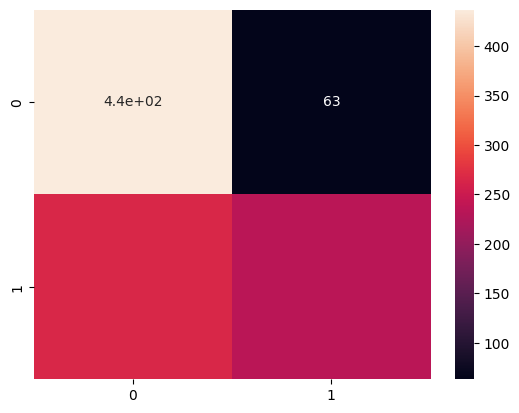

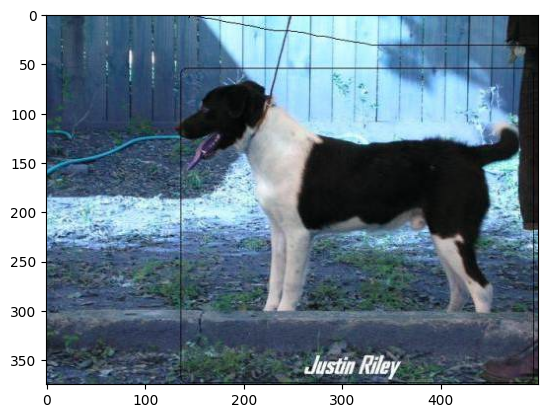

0
Cão

 Fim 2024-05-03 09:50:22.982998

 Tempo 0:07:47.660087


In [3]:
# Exercicio 64 
#Classificador de Imagens caes e gatos 

#Importando as bibliotecas 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow
tf.__version__
import os
import random
from PIL import Image

#Calcular Tempo 
import datetime
data_hora_atual_ini = datetime.datetime.now()
print(" \n Inicio",data_hora_atual_ini)

def escolher_arquivo_aleatorio(caminho_da_pasta):
    # Lista todos os arquivos na pasta
    arquivos = os.listdir(caminho_da_pasta)
    
    # Filtra apenas os arquivos (remove pastas)
    arquivos = [arquivo for arquivo in arquivos if os.path.isfile(os.path.join(caminho_da_pasta, arquivo))]
    
    # Escolhe um arquivo aleatoriamente
    arquivo_aleatorio = random.choice(arquivos)
    
    # Retorna o caminho completo do arquivo escolhido
    return os.path.join(caminho_da_pasta, arquivo_aleatorio)

# Exemplo de uso
import os
import random
from PIL import Image

def escolher_arquivo_aleatorio(caminho_da_pasta):
    # Lista todos os arquivos na pasta
    arquivos = os.listdir(caminho_da_pasta)
    
    # Filtra apenas os arquivos (remove pastas)
    arquivos = [arquivo for arquivo in arquivos if os.path.isfile(os.path.join(caminho_da_pasta, arquivo))]
    
    # Escolhe um arquivo aleatoriamente
    arquivo_aleatorio = random.choice(arquivos)
    
    # Retorna o caminho completo do arquivo escolhido
    return os.path.join(caminho_da_pasta, arquivo_aleatorio)


# Funcao Gerar numero
def num_aleat(num_min,num_max):
    import random
    num_ger = random.randrange(num_min,num_max)
    return num_ger




# Conexão do Google Colava à pasta do Google Drive, local onde deverá ter salvo a pasta caes-e-gatos.zip
#from google.colab import drive
#drive.mount('/content/drive')
# Descompactar a pasta caes-e-gatos na pasta de Arquivos do Google Colab
#path = '/content/drive/MyDrive/caes-e-gatos.zip'
#zip_object = zipfile.ZipFile(file=path, mode='r')
#zip_object.extractall('./')
#zip_object.close()

#Carregamento das imagens
# Localizar o caminho da primeira imagem de gato na pasta treinamento
cat_arq_ini = 'D:/Dados/caes-e-gatos/caes-e-gatos/treinamento/gato/cat.0.jpg'
tf.keras.preprocessing.image.load_img(cat_arq_ini)

# Localizar o caminho da primeira imagem de cão na pasta treinamento
dog_arq_ini = 'D:/Dados/caes-e-gatos/caes-e-gatos/treinamento/cao/dog.0.jpg'
tf.keras.preprocessing.image.load_img(dog_arq_ini)

#Base de treinamento e teste
# Localizar as 4000 imagens, nas duas classes para a base de treinamento
dir_train = 'D:/Dados/caes-e-gatos/caes-e-gatos/treinamento/'
gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
dataset_treinamento = gerador_treinamento.flow_from_directory(dir_train,
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        shuffle = True)



# Estabelecendo índices para as classes no treinamento 0: cão e 1: gato
dataset_treinamento.class_indices                                                        

# Localizar o campinho para a paste de teste, contendo 1000 imagens com as duas classes
dir_test = 'D:/Dados/caes-e-gatos/caes-e-gatos/teste/'
gerador_teste = ImageDataGenerator(rescale=1./255)
dataset_teste = gerador_teste.flow_from_directory(dir_test,
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)


#Construção e treinamento da rede neural
# Criando cada camada da rede neural, conforme o modelo sequencial da rede neural convolucional
network = Sequential()
network.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units = 3137, activation='relu'))
network.add(Dense(units = 3137, activation='relu'))
network.add(Dense(units = 2, activation='softmax'))

# Visualizando o modelo com as classes criadas
network.summary()

# Estabelecendo as taxas de perda e acurácia para o modelo
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# Treinando o modelo com 10 épocas de treinamento
# OBSERVAÇÃO: esta execução pode demorar conforme o desempenho de sua máquina
historico = network.fit(dataset_treinamento, epochs=10)

# Avaliação da rede neural
# Estabelecendo índices para as classes no teste 0: cão e 1: gato
dataset_teste.class_indices

# Trazendo ao modelo as predições do treinamento
previsoes = network.predict(dataset_teste)

# Verificando a máxima previsão para as classes
previsoes = np.argmax(previsoes, axis = 1)

# Verificando os dados do modelo treinado
dataset_teste.classes

# Demonstrando a acurácia do modelo treinado
from sklearn.metrics import accuracy_score
accuracy_score(dataset_teste.classes, previsoes)

#OBSERVAÇÃO: o valor demonstrado acima é a precisão do treinamento do modelo. Valores quanto mais próximos de 1, mais precisa será a classificação. Para aumentar a precisão, pode-se retreinar o modelo ou ainda inserir mais imagens para o treinamento

# Atribuindo as classes ao modelo treinado
dataset_teste.class_indices

# Estabelecendo a matriz de confusão para confronto do dados entre as classes
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dataset_teste.classes, previsoes)

# Demonstrando a matriz de confusão
sns.heatmap(cm, annot=True);

# Classificando os dados obtidos
from sklearn.metrics import classification_report
print(classification_report(dataset_teste.classes, previsoes))

# Salvar e carregar a rede neural
# Gerando um arquivo .json com os dados do modelo
model_json = network.to_json()
with open('network.json','w') as json_file:
  json_file.write(model_json)

  # Criando o arquivo de pesos (pesos.hdf5) do treinamento
dir_salv_pesos_keras = 'D:/Dados/caes-e-gatos/caes-e-gatos/pesos.keras'
from keras.models import save_model
network_saved = save_model(network, dir_salv_pesos_keras)

# Visualizando os dados salvos no arquivo .json
dir_salv_json = 'D:/Dados/caes-e-gatos/caes-e-gatos/network.json'
with open('network.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

# Atribuindo o treinamento ao modelo
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights(dir_salv_pesos_keras)
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Visualizando o modelo de rede neural
network_loaded.summary()



# Gera um numero aleatorio de 1 a 4 para os diretorios 
# Por funcao retorma o numero o numero aleatorio
num_ger = num_aleat(1,4)

if num_ger == 1:
    caminho_da_pasta = 'D:/Dados/caes-e-gatos/caes-e-gatos/teste/cao/'
elif num_ger == 2:
    caminho_da_pasta = 'D:/Dados/caes-e-gatos/caes-e-gatos/teste/gato/'
elif num_ger == 3:
    caminho_da_pasta = 'D:/Dados/caes-e-gatos/caes-e-gatos/treinamento/cao/'
elif num_ger == 4:
    caminho_da_pasta = 'D:/Dados/caes-e-gatos/caes-e-gatos/treinamento/gato/'

# Apos diretorio aleatorio, escolhe arquivo aleatorio para analise
# Assim é possivel juntar mais de um diretório
arquivo_aleatorio = escolher_arquivo_aleatorio(caminho_da_pasta)
print("Arquivo escolhido aleatoriamente:", arquivo_aleatorio)




# Classificação de uma única imagem
# Na pasta teste, localize qualquer imagem para a classificação, conforme o modelo treinado
# Abre o arquivo de imagem
dir_arq_analise  = arquivo_aleatorio
imagem = cv2.imread(arquivo_aleatorio)
#imagem = Image.open(arquivo_aleatorio)
   
# Exibe a imagem
plt.show()
plt.imshow(imagem)
#imagem.show()
#imagem = cv2.imread('/content/caes-e-gatos/teste/cao/dog.3501.jpg')


# Redimensionando a imagem em 64x64 pixels
imagem = cv2.resize(imagem, (64, 64))
#cv2_imshow(imagem)
plt.show()

# Convertendo em escala de cinza
imagem = imagem / 255

# Parâmetros da imagem redimensionada
imagem = imagem.reshape(-1, 64, 64, 3)
imagem.shape


resultado = network_loaded(imagem)
resultado

# Demonstrando a classe que obteve o maior resultado
resultado = np.argmax(resultado)
resultado
print(resultado)

# Verificando as classes do modelo
dataset_teste.class_indices
print(dataset_teste)

# Categorizando o resultado
if resultado == 0:
  print('Cão')
else:
  print('Gato')

  #Calcular Tempo 
data_hora_atual_fim = datetime.datetime.now()
print("\n Fim",data_hora_atual_fim)
tempo = data_hora_atual_fim - data_hora_atual_ini
print('\n Tempo',tempo)